In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#chunks = pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical_to_num.csv.zip' 
                       ,chunksize=50000)

In [2]:
# file_path = '/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical_to_num.csv.zip'
# chunk_size = 10000  # Adjust this based on your memory constraints

# # Initialize a dictionary to store the total null counts for each column
# total_null_counts = {}

# # Iterate through the file in chunks
# for chunk in pd.read_csv(file_path, chunksize=chunk_size):
#     # Calculate null counts for each chunk
#     chunk_null_counts = chunk.isnull().sum()
    
#     # Accumulate the null counts for each column
#     for column, null_count in chunk_null_counts.items():
#         total_null_counts[column] = total_null_counts.get(column, 0) + null_count

# # Sort the columns based on the total null counts (ascending order)
# sorted_columns = sorted(total_null_counts.items(), key=lambda x: x[1])

# # Keep only the first 500 columns with the fewest null values
# columns_to_keep = [column for column, _ in sorted_columns[:500]]

# # Load the selected columns into a new DataFrame
# df = pd.read_csv(file_path, usecols=columns_to_keep)

# # Print the DataFrame with the 500 columns
# #print(df)

In [7]:
from tqdm import tqdm  

file_path = '/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical_to_num.csv.zip'
chunk_size = 10000

# Get the total number of rows in the file for the progress bar
total_rows = 1183747

# Initialize a dictionary to store the total null counts for each column
total_null_counts = {}

# Create a tqdm progress bar
progress_bar = tqdm(total=total_rows, desc="Processing rows")

# Iterate through the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Calculate null counts for each chunk
    chunk_null_counts = chunk.isnull().sum()
    
    # Accumulate the null counts for each column
    for column, null_count in chunk_null_counts.items():
        total_null_counts[column] = total_null_counts.get(column, 0) + null_count
    
    # Update the progress bar
    progress_bar.update(len(chunk))

# Close the progress bar after completing the iterations
progress_bar.close()

# Sort the columns based on the total null counts (ascending order)
sorted_columns = sorted(total_null_counts.items(), key=lambda x: x[1])

# Keep only the first 500 columns with the fewest null values
columns_to_keep = [column for column, _ in sorted_columns[:500]]

# Load the selected columns into a new DataFrame
df = pd.read_csv(file_path, usecols=columns_to_keep)


Processing rows: 100%|██████████████| 1183747/1183747 [08:50<00:00, 2232.54it/s]


In [8]:
traindata = None

In [9]:
numerical = pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_numeric.csv.zip',
                             usecols=["Id","Response"],chunksize=10000,low_memory=False)

In [5]:
# chunk_size = 10000

# # Create an empty list to store the merged chunks
# merged_chunks = []

# # Iterate over the data in chunks for both dataframes
# for chunk1, chunk2 in (pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical_to_num.csv.zip', 
#                                    chunksize=chunk_size), 
#                        pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_numeric.csv.zip', 
#                                    usecols=["Id","Response"], chunksize=chunk_size)):
#     # Merge the chunks based on the "id" column
#     merged_chunk = pd.merge(chunk1, chunk2, on='Id')

#     merged_chunks.append(merged_chunk)

# # Concatenate all the merged chunks into a single dataframe
# merged_data = pd.concat(merged_chunks)

# merged_data.head()

NameError: name 'pd' is not defined

In [10]:
import pandas as pd
from tqdm import tqdm
from itertools import zip_longest

chunk_size = 10000
merged_chunks = []

# Read the data in chunks for both dataframes
data1_chunks = pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical_to_num.csv.zip', usecols=columns_to_keep, chunksize=chunk_size)
data2_chunks = pd.read_csv('/Users/maguoyi/Downloads/bosch-production-line-performance/train_numeric.csv.zip', usecols=["Id","Response"], chunksize=chunk_size)

total_chunks = 119

# Create a tqdm progress bar with a description
progress_bar = tqdm(total=total_chunks, desc="Merging Chunks")

for chunk1, chunk2 in zip_longest(data1_chunks, data2_chunks):
    # Merge the chunks based on the "Id" column
    merged_chunk = pd.merge(chunk1, chunk2, on='Id')

    merged_chunks.append(merged_chunk)

    # Update the progress bar
    progress_bar.update(1)

    # Calculate and display the percentage progress
    progress_bar.set_postfix({"Progress": "{:.2f}%".format(progress_bar.n / total_chunks * 100)})

# Close the progress bar
progress_bar.close()


Merging Chunks: 100%|███████| 119/119 [03:14<00:00,  1.64s/it, Progress=100.00%]


In [11]:
data = pd.concat(merged_chunks)

In [12]:
data.head()

,Id,L0_S9_F151,L0_S9_F154,L0_S9_F161,L0_S9_F164,L0_S9_F166,L0_S9_F171,L0_S9_F174,L0_S10_F215,L0_S10_F218,...,L3_S47_F4151,L3_S47_F4156,L3_S47_F4161,L3_S47_F4166,L3_S47_F4171,L3_S47_F4176,L3_S47_F4181,L3_S47_F4186,L3_S47_F4191,Response
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
import xgboost as xgb

In [14]:
chunk_size = 10000
import numpy as np
chunks = np.array_split(data, 119)

In [15]:
model = xgb.XGBClassifier(n_estimators=30)

In [16]:
ctr=0
for chunk in chunks:
    print(type(chunk))
    model.fit(chunk.drop(['Id','Response'],axis=1),chunk['Response'])
    ctr+=1
    print(ctr)

<class 'pandas.core.frame.DataFrame'>
1
<class 'pandas.core.frame.DataFrame'>
2
<class 'pandas.core.frame.DataFrame'>
3
<class 'pandas.core.frame.DataFrame'>
4
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
6
<class 'pandas.core.frame.DataFrame'>
7
<class 'pandas.core.frame.DataFrame'>
8
<class 'pandas.core.frame.DataFrame'>
9
<class 'pandas.core.frame.DataFrame'>
10
<class 'pandas.core.frame.DataFrame'>
11
<class 'pandas.core.frame.DataFrame'>
12
<class 'pandas.core.frame.DataFrame'>
13
<class 'pandas.core.frame.DataFrame'>
14
<class 'pandas.core.frame.DataFrame'>
15
<class 'pandas.core.frame.DataFrame'>
16
<class 'pandas.core.frame.DataFrame'>
17
<class 'pandas.core.frame.DataFrame'>
18
<class 'pandas.core.frame.DataFrame'>
19
<class 'pandas.core.frame.DataFrame'>
20
<class 'pandas.core.frame.DataFrame'>
21
<class 'pandas.core.frame.DataFrame'>
22
<class 'pandas.core.frame.DataFrame'>
23
<class 'pandas.core.frame.DataFrame'>
24
<class 'pandas.core.frame

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

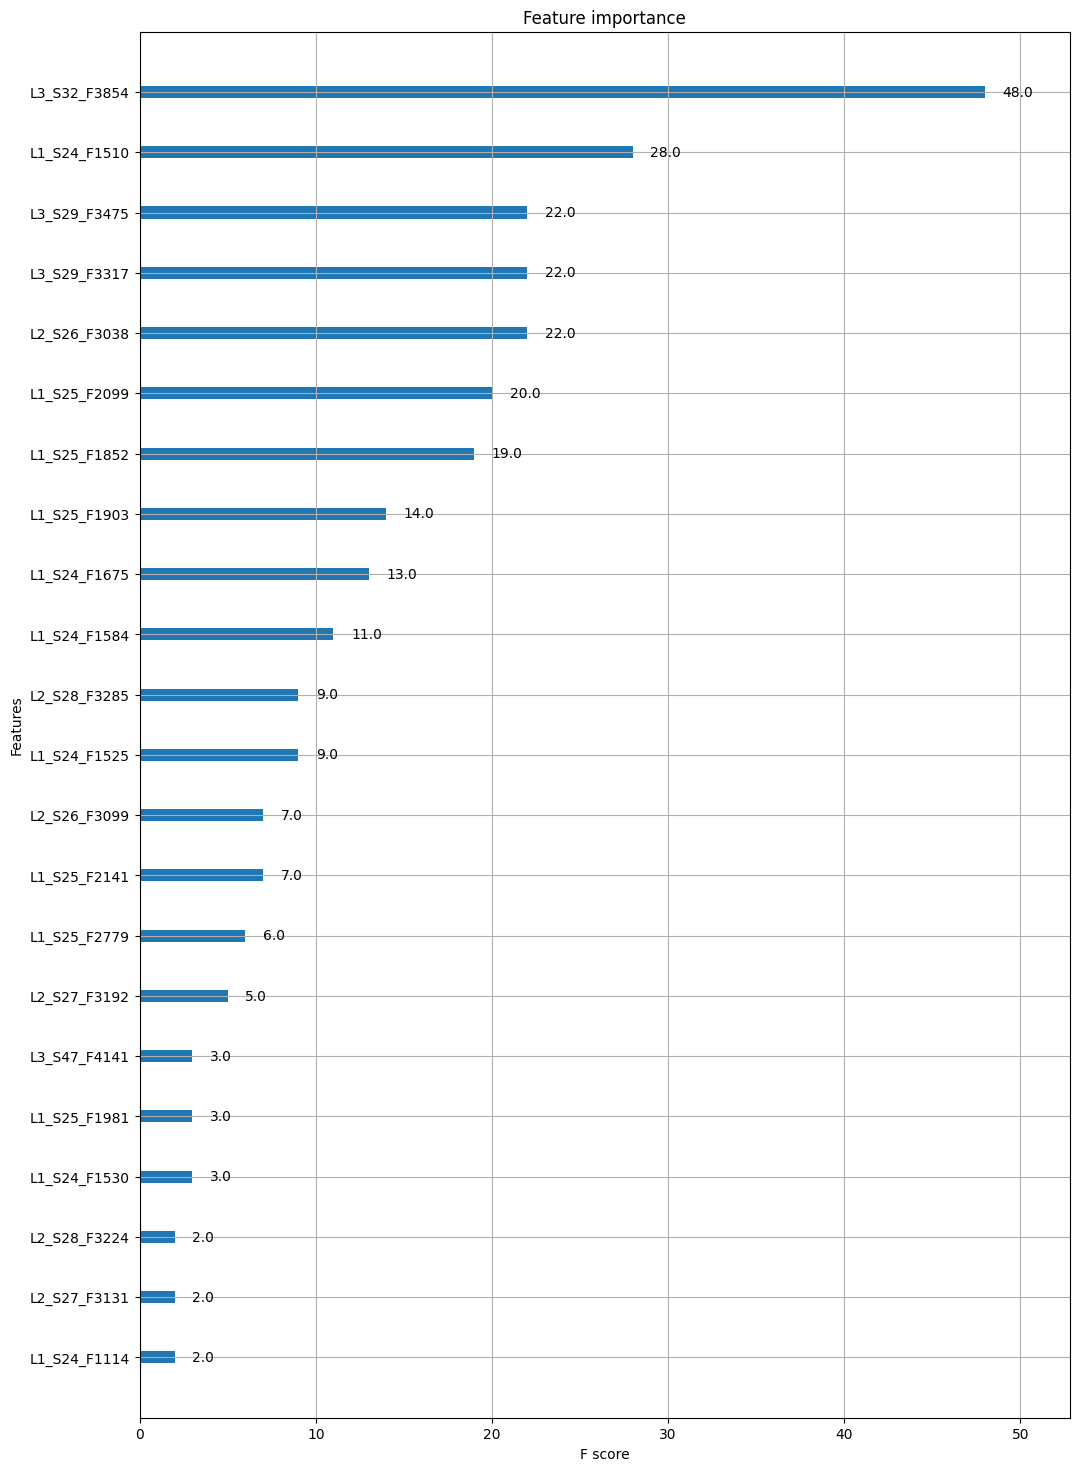

In [17]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model,ax =ax,max_num_features=40)

In [18]:
np.set_printoptions(suppress
                    =True)

In [19]:
imp = model.feature_importances_

In [20]:
name =model.get_booster().feature_names

In [21]:
pd.DataFrame({'feat':name,'impo':imp}).sort_values(by='impo',ascending=False)['feat'].head(35).values

array(['L3_S32_F3854', 'L1_S24_F1675', 'L2_S27_F3131', 'L1_S24_F1584',
       'L3_S29_F3317', 'L1_S24_F1510', 'L1_S24_F1525', 'L1_S24_F1530',
       'L1_S25_F2099', 'L2_S28_F3224', 'L1_S25_F1903', 'L2_S28_F3285',
       'L3_S29_F3475', 'L1_S25_F1852', 'L3_S47_F4141', 'L2_S26_F3038',
       'L1_S25_F2141', 'L2_S26_F3099', 'L2_S27_F3192', 'L1_S25_F2779',
       'L1_S25_F1981', 'L1_S24_F1114', 'L2_S26_F3042', 'L1_S25_F2948',
       'L2_S26_F3045', 'L2_S26_F3049', 'L2_S26_F3053', 'L1_S25_F3013',
       'L1_S25_F2983', 'L1_S25_F2993', 'L1_S25_F2988', 'L1_S25_F2938',
       'L1_S25_F2978', 'L1_S25_F2973', 'L1_S25_F2968'], dtype=object)